## ЛАБОРАТОРНАЯ РАБОТА №3
## ПРИМЕНЕНИЕ МЕТОДОВ КЛАССИФИКАЦИИ

Подключаем библиотеку для обработки и анализа данных

In [1]:
import pandas as pd

Загружаем датасет

In [2]:
df = pd.read_csv("4heart2.csv")

Выводим информацию о данных датасета

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Вывод первыx 10 строк датасета

In [4]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Проанализировали  данные. Формат данных правильный, только названия столбцов нужно привести к единому змеиному регистру, и исправить тип данных в "age" на int.

# Предварительная подготовка данных

Исправим тип возраста на Int

In [5]:
df[["age"]] = df[["age"]].astype(int)

#### Устранение проблем названий столбцов

Вывели названия столбцов таблицы

In [6]:
print(*df.columns.tolist(), sep='\n')

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


Приведём названия столбцов к нижнему регистру

In [7]:
df.columns = df.columns.str.lower()
print(*df.columns.tolist(), sep='\n')

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
death_event


Теперь названия столбцов имеют единый стиль змеиного регистра.

#### Обработка пропусков

Поиск пустых значений

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

Пропусков в датасете не оказалось, исправлять ничего не нужно – это упрощает нам работу.

#### Устранение дубликатов 

Проверим, есть ли дубликаты в таблице

In [9]:
df.duplicated().sum()

0

Дубликаты отсутствуют.

#### Нормализация данных

Масштабирование данных будем производить с помощью класса MinMaxScaler() из модуля preprocessing библиотеки для машинного обучения sklearn, в результате мы получим значения параметров в диапазоне от 0 до 1.

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
df_sc = scaler.transform(df)

In [11]:
df_sc = pd.DataFrame(df_sc, columns = df.columns)

Посмотрели распределение признаков в датасете

# Классификация данных

## Целевой признак

Целевым признаком для нашего набора данных является поле ***death_event*** – *Факт смерти*, т.к. основная задача врачебных наблюдений в том, чтобы пациент был жив и здоров.

Отделили матрицу ***объект-признаков X*** и ***вектор целевой переменной y*** с помощью метода **drop()** библиотеки Pandas, это необходимо для проведения корректного обучения

In [13]:
y = df_sc['death_event']
X = df_sc.drop(['death_event'], axis=1)

In [14]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


In [15]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
294    0.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: death_event, Length: 299, dtype: float64

## Разбиение набора данных на тренировочной и тестовый датасеты с помощью train_test_split

Размер тренировочной выборки 175 записей, что составляет 58,3% от общего количества записей 300, и 125 тестовая выборка.

Что результат разделения повторялся от запуска к запуску установили значение параметра random_state. 

Импорт модуля для разбиения датасета на тренировочной и тестовый 

In [16]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.583, random_state=42)

Проверка разбиения

In [17]:
import numpy as np


print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [129  45]
Количество строк в y_test по классам: [74 51]


## Разработка предсказательных моделей качественного отклика

### Метод k- ближайших соседей

Суть метода в отнесении объекта к какому-то классу на основании расстояния от него до центров кластеров, определённых моделью в процессе обучения.
Для классификации методом К-ближайших соседей воспользовались моделью, предоставляемой модулем KNeighborsClassifier из библиотеки Scikit-learn.

Обучение проводили на специально подготовленных данных X_train (объект-признаков) и y_train (вектор целевой переменной).
Задали параметр n_neighbors = 4, который обозначает количество кластеров алгоритма K-ближайших соседей. Значение было получено в прошлой лабораторной работе при кластеризации агломеративно иерархическим методом.

Импорт модели К-ближайших

In [18]:
from sklearn.neighbors import KNeighborsClassifier

Создание объекта модели

In [19]:
KNeighbors_model = KNeighborsClassifier(n_neighbors = 4)

Обучение модели

In [20]:
KNeighbors_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Сделали предсказание для тестовой части данных (X_test)

In [21]:
KNeighbors_pred = KNeighbors_model.predict(X_test)

### Логистическая регрессия

Суть метода в отнесении объекта к какому-то классу на основании его положения относительно плоскости, которая разбивает пространство объектов на кластеры (в нашем случае на два кластера). Положение плоскости в пространстве объектов определяется моделью в ходе обучения.
Для классификации методом Логической регрессии воспользовались моделью, предоставляемой модулем LogisticRegression из библиотеки Scikit-learn.

Обучение проводили на специально подготовленных данных X_train (объект-признаков) и y_train (вектор целевой переменной).

Импорт модели К-ближайших

In [22]:
from sklearn.linear_model import LogisticRegression

Создание объекта модели

In [23]:
LogisticReg_model = LogisticRegression()

Обучение модели

In [24]:
LogisticReg_model.fit(X_train, y_train)

LogisticRegression()

Сделали предсказание для тестовой части данных (X_test)

Делаем предсказание

In [25]:
LogisticReg_pred = LogisticReg_model.predict(X_test)

### Случайный лес

Суть метода состоит в использовании нескольких решающих деревьев. Само по себе решающее дерево предоставляет крайне невысокое качество классификации, но из-за большого их количества результат значительно улучшается.
Для классификации методом Случайный лес воспользовались моделью, предоставляемой модулем RandomForestClassifier из библиотеки Scikit-learn.

Обучение проводили на специально подготовленных данных X_train (объект-признаков) и y_train (вектор целевой переменной).

Импорт модели Случайный лес

In [26]:
from sklearn.ensemble import RandomForestClassifier

Создание объекта модели

In [27]:
RandForest_model = RandomForestClassifier()

Обучение модели

In [28]:
RandForest_model.fit(X_train, y_train)

RandomForestClassifier()

Сделали предсказание для тестовой части данных (X_test)

Делаем предсказание

In [29]:
RandForest_pred = RandForest_model.predict(X_test)

## Оценка ошибок классификации

### Метрика "Accuracy" (Доля правильных ответов)

Метрика показывает процент значений, которые модель угадала правильно при проверке на тестовых данных.

Импорт метода для метрики "Accuracy"

In [30]:
from sklearn.metrics import accuracy_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оценка метрики "Accuracy" (Доля правильных ответов) для моделей:')
for pred in model_list:
  score = accuracy_score(y_test, pred[1])
  print('\t>', pred[0], round(score, 4))

Оценка метрики "Accuracy" (Доля правильных ответов) для моделей:
	> "К-ближайших"          : 0.616
	> "Логическая регрессия" : 0.728
	> "Случайный лес"        : 0.76


Самый лучший результат у модели Случайный лес точность предсказаний 76%, Логическая регрессия показала схожий, но немного хуже результат, а К-ближайших показал лишь 61%.

### Метрика "Balanced accuracy" (Cбалансированная точность)

Показывает среднюю точность для классов, используется для оценки несбалансированных классов.

Импорт метода для метрики "Balanced accuracy"

In [31]:
from sklearn.metrics import balanced_accuracy_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оценка метрики "Balanced accuracy" (Cбалансированная точность) для моделей:')
for pred in model_list:
  score = balanced_accuracy_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оценка метрики "Balanced accuracy" (Cбалансированная точность) для моделей:
	> "К-ближайших"          : 0.5294
	> "Логическая регрессия" : 0.6667
	> "Случайный лес"        : 0.715


Самый лучший результат у модели Случайный лес точность предсказаний 71%, Логическая регрессия показала схожий, но немного хуже результат, а К-ближайших показал 52%.

### Метрика "Precision" (Точность)

Метрика показывает какая доля прогнозов относительно "1" класса верна. То есть смотрим долю правильных ответов только среди целевого класса.

Импорт метода для метрики "Precision"

In [32]:
from sklearn.metrics import precision_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оценка метрики "Precision" (Точность) для моделей:')
for pred in model_list:
  score = precision_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оценка метрики "Precision" (Точность) для моделей:
	> "К-ближайших"          : 1.0
	> "Логическая регрессия" : 1.0
	> "Случайный лес"        : 0.8889


Лучший результат у K-ближайших и Логрега - 100%, RandForest - 92%

### Метрика "Recall" (Полнота)

Импорт метода для метрики "Recall"

In [33]:
from sklearn.metrics import recall_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оценка метрики "Recall" (Полнота) для моделей:')
for pred in model_list:
  score = recall_score(y_test, pred[1]) # Оценка для модели
  print('\t>', pred[0], round(score, 4))

Оценка метрики "Recall" (Полнота) для моделей:
	> "К-ближайших"          : 0.0588
	> "Логическая регрессия" : 0.3333
	> "Случайный лес"        : 0.4706


Самый лучший результат у модели Случайный лес точность предсказаний 47%, Логическая регрессия показала схожий, но немного хуже результат, а К-ближайших составил всего около 6%.

### Метрика 'F1 score' (F-мера, Сбалансированная Точность/Полнота)

Импорт метода для метрики "F1 score"

In [34]:
from sklearn.metrics import f1_score


model_list = [['"К-ближайших"          :', KNeighbors_pred],
              ['"Логическая регрессия" :', LogisticReg_pred],
              ['"Случайный лес"        :', RandForest_pred]]

print('Оценка метрики "F1 score" (F-мера) для моделей:')
for pred in model_list:
  score = f1_score(y_test, pred[1])
  print('\t>', pred[0], round(score, 4))

Оценка метрики "F1 score" (F-мера) для моделей:
	> "К-ближайших"          : 0.1111
	> "Логическая регрессия" : 0.5
	> "Случайный лес"        : 0.6154


## Матрица неточностей

Данная матрица дает количественную оценку предсказаний данных моделью, показывая сколько положительных и отрицательных значений угадано верно и ошибочно.

На основании данной матрицы производятся расчеты всех ранее полученных метрик, а на основании группы таких матриц, полученных при разных пороговых значениях, строится ROC-кривая.

Импорт модуля для построения Матрицы неточностей

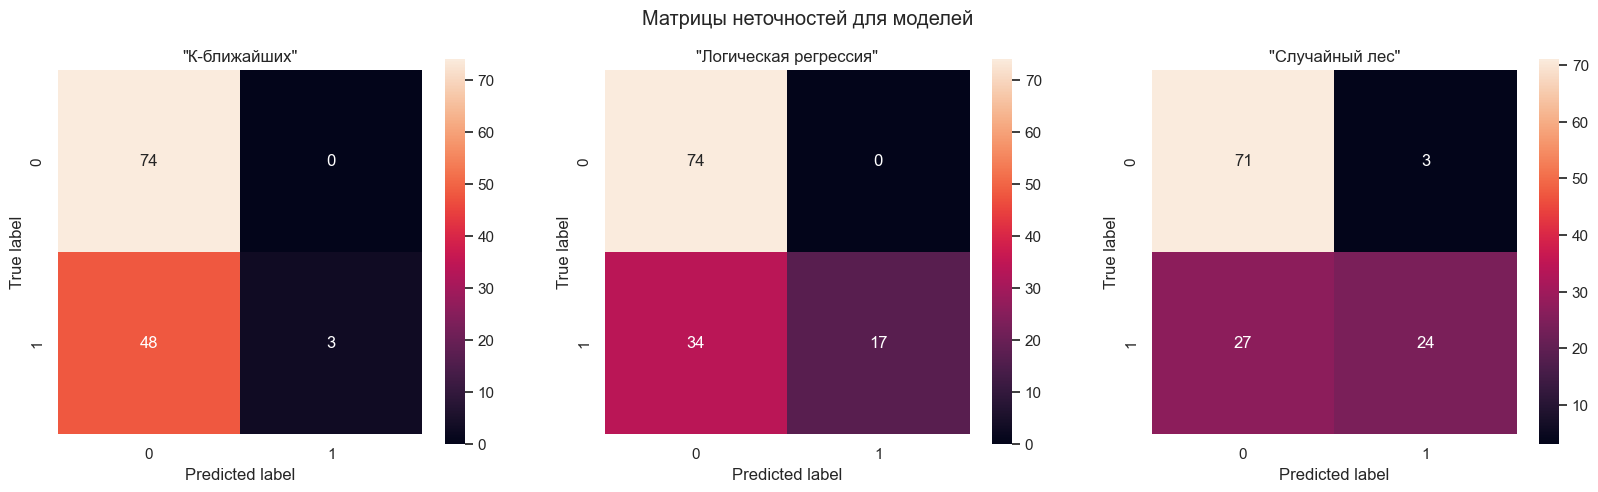

In [35]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from seaborn import heatmap


model_list = [['"К-ближайших"', KNeighbors_pred],
              ['"Логическая регрессия"', LogisticReg_pred],
              ['"Случайный лес"', RandForest_pred]]

fig, axis = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Матрицы неточностей для моделей')

for idx, pred in enumerate(model_list):
  heatmap(confusion_matrix(y_test, pred[1]), annot=True, fmt=".0f", square=True, ax=axis[idx])
  axis[idx].set_title(pred[0])
  axis[idx].set_xlabel('Predicted label')
  axis[idx].set_ylabel('True label')

## Графики ROC-кривой

График ROC-кривой позволяет оценить при каком пороговом значении модель будет давать лучший результат при классификации данных.

Метрика AUC — это площадь под кривой ROC.

Общее правило гласит, чтобы определить оптимальную точку на кривой ROC, нужно максимизировать разницу (True Positive Rate (TPR) - False Positive Rate (FPR)), которая на графике представлена вертикальным расстоянием между полученной ROC-кривой и диагональной линией из точки (0, 0) в (1, 1).


Импорт модуля для построения 

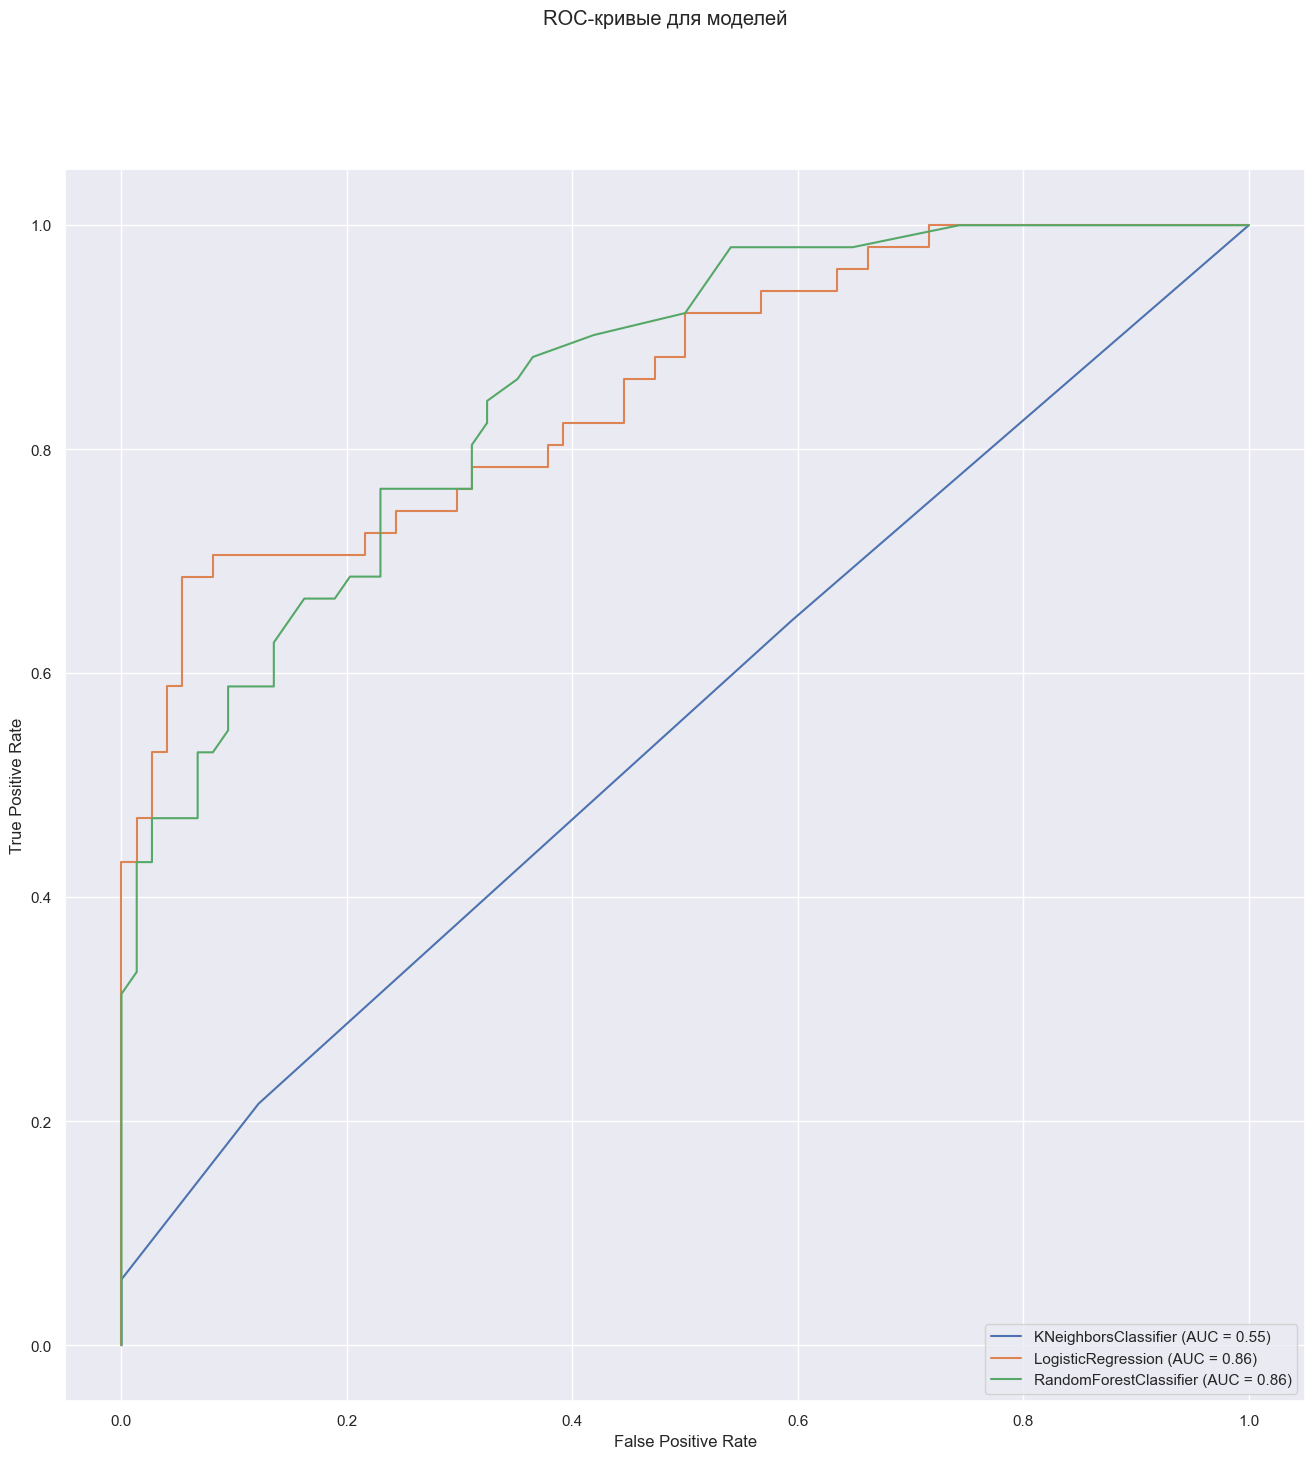

In [36]:
from sklearn.metrics import RocCurveDisplay
from matplotlib import pyplot as plt

model_list = [['"К-ближайших"', KNeighbors_model],
              ['"Логическая регрессия"', LogisticReg_model],
              ['"Случайный лес"', RandForest_model]]

fig, axis = plt.subplots(figsize=(16, 16))
fig.suptitle('ROC-кривые для моделей')

for idx, model in enumerate(model_list):
  RocCurveDisplay.from_estimator(model[1], X_test, y_test, ax=axis)
  axis.set_xlabel('False Positive Rate')
  axis.set_ylabel('True Positive Rate')

Оценка AUC показывает неплохие результаты для всех моделей, но самый лучший у моделей Логической регрессии и Случайного леса.

## Вывод
В ходе данной лабораторной работы мы подготовили датасет, провели на этих данных обучение различных моделей для задачи классификации и провели оценку качества.
Затем, чтобы можно было провести обучение моделей классификации, стандартизировали данные, чтобы установить подходящие размерности параметров.
Обучили три различные модели с применением методов K-ближайших соседей, Логической регрессии и Случайного леса.
Для нашей задачи лучше всего себя показала модель классификатора на основе метода Случайного леса, почти во всех метриках она ледировала. Кроме метрики "Precision", там 100% показали другие модели.
